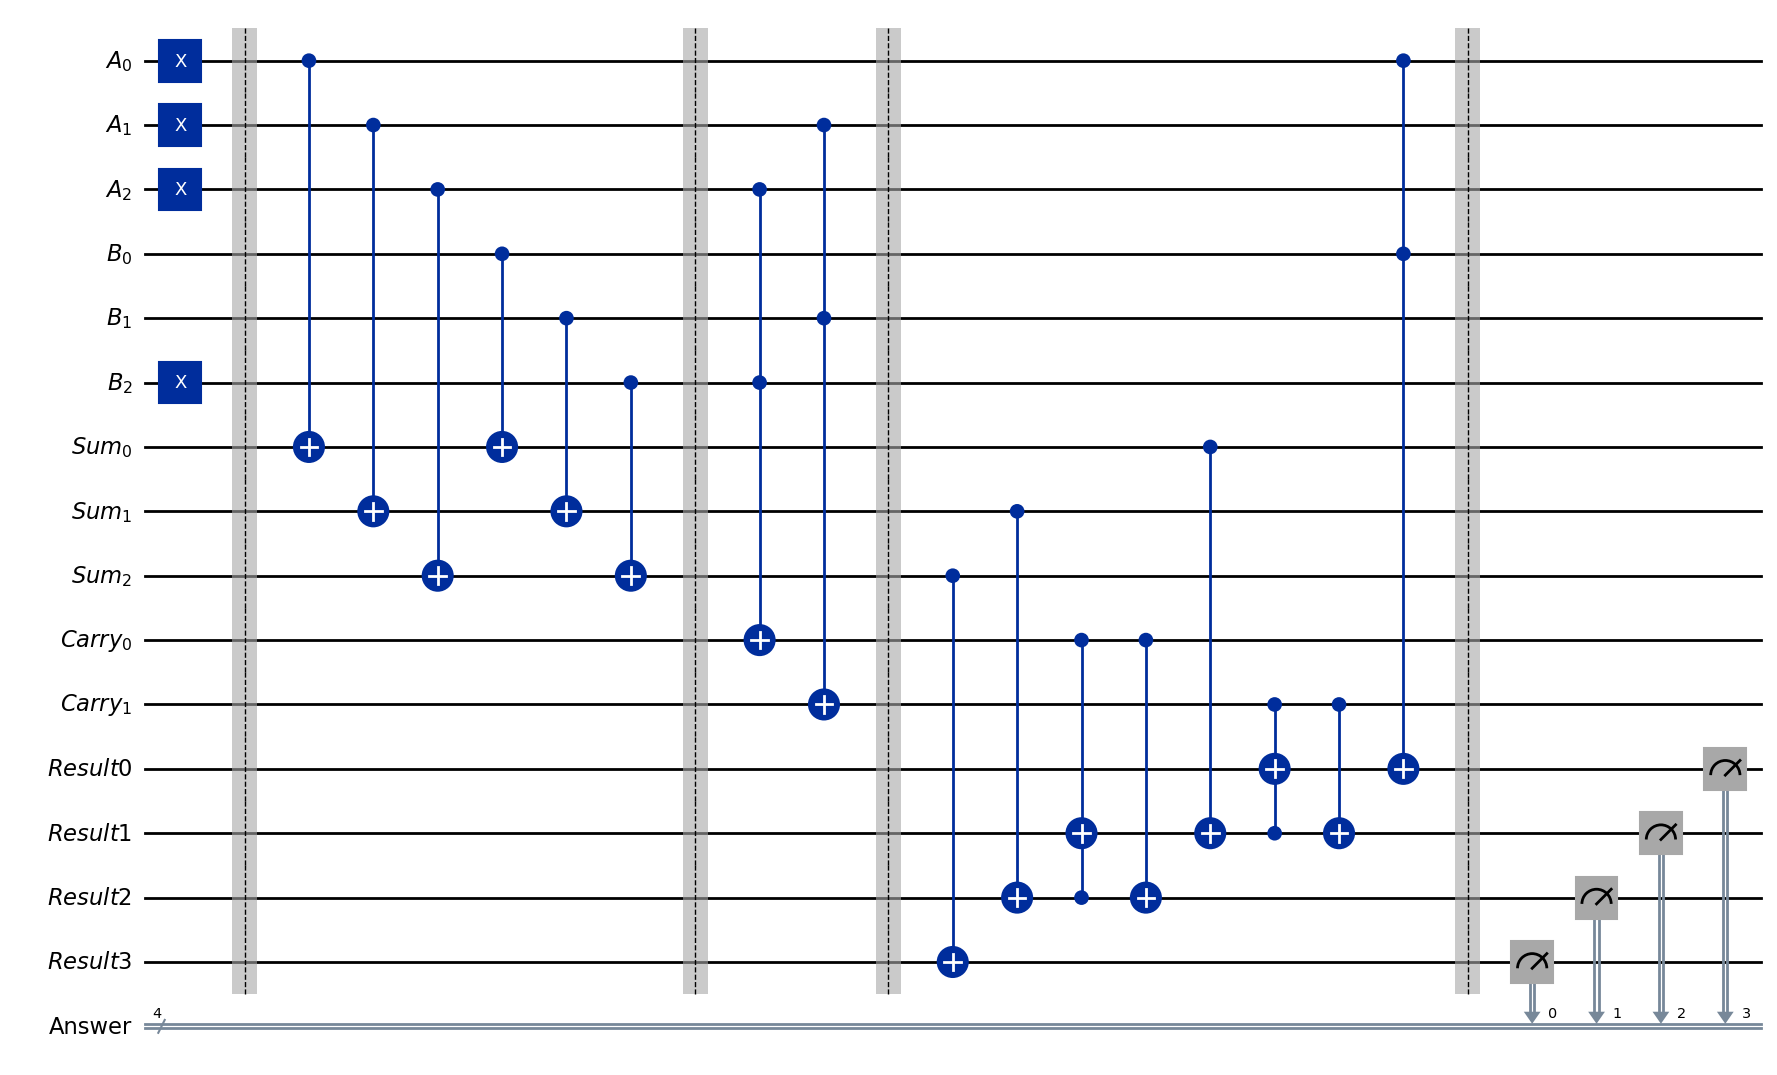

In [49]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

A = QuantumRegister(3, 'A')
B = QuantumRegister(3 , 'B')

S = QuantumRegister(3 , 'Sum')
C = QuantumRegister(2 , 'Carry')
R0 = QuantumRegister(1 , 'Result0')
R1 = QuantumRegister(1 , 'Result1')
R2 = QuantumRegister(1 , 'Result2')
R3 = QuantumRegister(1 , 'Result3')

Ans = ClassicalRegister(4 ,'Answer')

qc = QuantumCircuit(A,B,S,C,R0,R1,R2,R3,Ans)





########################   Input values as binary   #######################

x = input("Enter a binary number:")
y = input("Enter another binary number:")

for i, bit in enumerate(x):
    if bit == '1':
        qc.x(A[i])

for i, bit in enumerate(y):
    if bit == '1':
        qc.x(B[i])

############################################################################



qc.barrier()

qc.cx(A[0],S[0])
qc.cx(B[0],S[0])
qc.cx(A[1],S[1])
qc.cx(B[1],S[1])
qc.cx(A[2],S[2])
qc.cx(B[2],S[2])

qc.barrier()

qc.ccx(A[2],B[2],C[0])
qc.ccx(A[1],B[1],C[1])

qc.barrier()

qc.cx(S[2],R3)

qc.cx(S[1],R2)
qc.ccx(C[0],R2,R1)
qc.cx(C[0],R2)

qc.cx(S[0],R1)
qc.ccx(C[1],R1,R0)
qc.cx(C[1],R1)
qc.ccx(A[0],B[0],R0)

qc.barrier()


qc.measure(R3,Ans[0])
qc.measure(R2,Ans[1])
qc.measure(R1,Ans[2])
qc.measure(R0,Ans[3])


qc.draw("mpl")

{'0000': 1024}


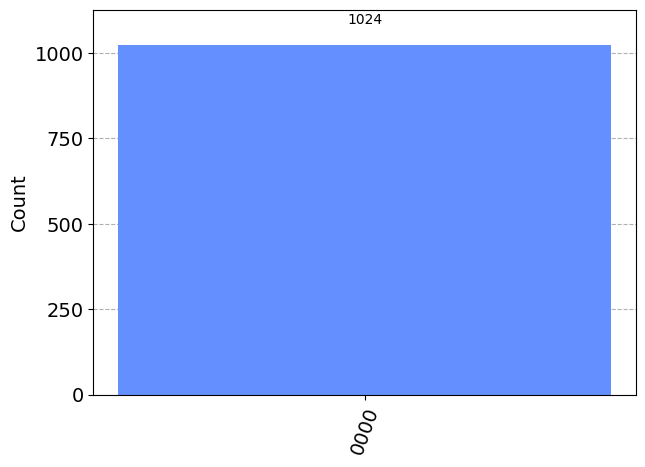

In [50]:
from qiskit_aer import AerSimulator


result = AerSimulator().run(qc).result()
stats = result.get_counts()

print(stats)

from qiskit.visualization import plot_histogram

plot_histogram(stats)